# Analysing the IPL data set

One of the main reasons behind choosing this data set is because of my interest in cricketing world. Also the most famous league in the world is the Indian Premiere League so it was always an option to analyze what has been the past records and results of the league. To download the data opendatasets has been used and to clean and visualize the data pandas, matplotlib and seaborn has been used. 

## Downloading the Dataset

To download the dataset from the kaggle directly into the project folder opendatasets module has been first installed
and then imported.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
#Lets load the url into ipl_data_url object
ipl_data_url = 'https://www.kaggle.com/patrickb1912/ipl-complete-dataset-20082020' 

In [3]:
import opendatasets as od
od.download(ipl_data_url)

The dataset has been downloaded and extracted.

In [4]:
#Lets see how many files are there in the dataset which has been downloaded
data_dir = './ipl-complete-dataset-20082020'

In [5]:
import os
os.listdir(data_dir)

['IPL Ball-by-Ball 2008-2020.csv', 'IPL Matches 2008-2020.csv']

Lets save our work to Jovian.

In [6]:
project_name = "zerotopandas-course-project-ipl" 

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "khush3nandecha/zerotopandas-course-project-ipl" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/khush3nandecha/zerotopandas-course-project-ipl


'https://jovian.ai/khush3nandecha/zerotopandas-course-project-ipl'

## Data Preparation and Cleaning

Lets load the required libraries and then using them load the dataset and perform the required operations.



In [9]:
import pandas as pd

In [10]:
#Let us first load the dataset into an object named ipl_matches
ipl_matches = pd.read_csv('./ipl-complete-dataset-20082020/IPL Matches 2008-2020.csv')

In [11]:
ipl_matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [12]:
ipl_matches.tail()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi
815,1237181,Dubai,2020-11-10,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon


It is evident that the data set contains matches from 18-4-2008 to 10-11-2020

In [13]:
#Now lets see the number of rows and columns in the data set.
ipl_matches.shape

(816, 17)

###### Total of 816 IPL matches has been played till 10-11-2020

Now lets see the number of tosses each team has won.

In [14]:
ipl_matches.toss_winner.value_counts()

Mumbai Indians                 106
Kolkata Knight Riders           98
Chennai Super Kings             97
Royal Challengers Bangalore     87
Rajasthan Royals                87
Kings XI Punjab                 85
Delhi Daredevils                80
Sunrisers Hyderabad             57
Deccan Chargers                 43
Delhi Capitals                  20
Pune Warriors                   20
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: toss_winner, dtype: int64

From the above result it is evident that team pune has appeared in the data with two names, so lets correct it.

In [15]:
ipl_matches[ipl_matches.toss_winner=='Rising Pune Supergiant']

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
578,1082592,Pune,2017-04-06,SPD Smith,Maharashtra Cricket Association Stadium,0,Rising Pune Supergiant,Mumbai Indians,Rising Pune Supergiant,field,Rising Pune Supergiant,wickets,7.0,N,NaN,A Nand Kishore,S Ravi
585,1082599,Pune,2017-04-11,SV Samson,Maharashtra Cricket Association Stadium,0,Rising Pune Supergiant,Delhi Daredevils,Rising Pune Supergiant,field,Delhi Daredevils,runs,97.0,N,NaN,AY Dandekar,S Ravi
601,1082615,Pune,2017-04-22,MS Dhoni,Maharashtra Cricket Association Stadium,0,Rising Pune Supergiant,Sunrisers Hyderabad,Rising Pune Supergiant,field,Rising Pune Supergiant,wickets,6.0,N,NaN,AY Dandekar,A Deshmukh
614,1082629,Pune,2017-05-01,BA Stokes,Maharashtra Cricket Association Stadium,0,Rising Pune Supergiant,Gujarat Lions,Rising Pune Supergiant,field,Rising Pune Supergiant,wickets,5.0,N,NaN,M Erasmus,C Shamshuddin
616,1082631,Kolkata,2017-05-03,RA Tripathi,Eden Gardens,0,Kolkata Knight Riders,Rising Pune Supergiant,Rising Pune Supergiant,field,Rising Pune Supergiant,wickets,4.0,N,NaN,KN Ananthapadmanabhan,A Nand Kishore
630,1082645,Pune,2017-05-14,JD Unadkat,Maharashtra Cricket Association Stadium,0,Rising Pune Supergiant,Kings XI Punjab,Rising Pune Supergiant,field,Rising Pune Supergiant,wickets,9.0,N,NaN,AY Dandekar,A Deshmukh


We can now see that the name is also wrong in team1, team2 and winner column, so lets correct the values.

In [16]:
#by using replace method we can change values within a cloumn
ipl_matches["toss_winner"].replace({'Rising Pune Supergiant':'Rising Pune Supergiants'},inplace=True)
ipl_matches["team1"].replace({'Rising Pune Supergiant':'Rising Pune Supergiants'},inplace=True)
ipl_matches["team2"].replace({'Rising Pune Supergiant':'Rising Pune Supergiants'},inplace=True)
ipl_matches["winner"].replace({'Rising Pune Supergiant':'Rising Pune Supergiants'},inplace=True)

In [17]:
ipl_matches.toss_winner.value_counts()

Mumbai Indians                 106
Kolkata Knight Riders           98
Chennai Super Kings             97
Royal Challengers Bangalore     87
Rajasthan Royals                87
Kings XI Punjab                 85
Delhi Daredevils                80
Sunrisers Hyderabad             57
Deccan Chargers                 43
Delhi Capitals                  20
Pune Warriors                   20
Gujarat Lions                   15
Rising Pune Supergiants         13
Kochi Tuskers Kerala             8
Name: toss_winner, dtype: int64

Now we can see that the name is corrected.

##### Now lets load another data set for more insights.

In [18]:
ball_by_ball = pd.read_csv('./ipl-complete-dataset-20082020/IPL Ball-by-Ball 2008-2020.csv')

In [19]:
ball_by_ball.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In this data every match has been recorded in depth so lets analyze and them take some usefull insights from this.

In [20]:
ball_by_ball.id.unique().shape[0]

816

So the number of matches in the second data set is similar to first one so we can take some usefull insights from the second one and combine it with first one.

In [21]:
first_inning_runs=[]
second_inning_runs=[]
total_wickets=[]
Id=[]
sixes=[]
fours=[]
for i in ball_by_ball.id.unique():                                 #for loop to create a dataframe with every single match
    df=ball_by_ball[ball_by_ball.id==i]                            #new dataframe with a single match
    Id.append(i)                                                   #new list with every id
    first_inning_runs.append(df[df.inning==1].total_runs.sum())    #new list with first inning run
    second_inning_runs.append(df[df.inning==2].total_runs.sum())   #new list with second inning runs
    total_wickets.append(df.is_wicket.sum())                       #new list with total wickets in a match
    fours.append((df.batsman_runs==4).sum())                       #new list with total fours in a match
    sixes.append((df.batsman_runs==6).sum())                       #new list with total sixes in a match
    data={'id':Id,                                                 #creating a data dictionary with all the lists
          'first_inning_runs':first_inning_runs,
          'second_inning_runs':second_inning_runs,
          'total_wickets':total_wickets,
          'fours':fours,
          'sixes':sixes}
    
df_new=pd.DataFrame(data)                                          #new df with all the columns we want


In [22]:
#new data frame with the calculated parameters
df_new

,id,first_inning_runs,second_inning_runs,total_wickets,fours,sixes
0,335982,222,82,13,18,17
1,335983,240,207,9,38,25
2,335984,129,132,9,32,4
3,335985,165,166,12,33,11
4,335986,110,112,15,11,10
...,...,...,...,...,...,...
811,1216547,201,201,8,23,26
812,1237177,200,143,13,28,18
813,1237178,131,132,11,21,4
814,1237180,189,172,11,28,14


In [23]:
merged_df= ipl_matches.merge(df_new,on="id")

In [24]:
merged_df

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,result_margin,eliminator,method,umpire1,umpire2,first_inning_runs,second_inning_runs,total_wickets,fours,sixes
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,140.0,N,NaN,Asad Rauf,RE Koertzen,222,82,13,18,17
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,...,33.0,N,NaN,MR Benson,SL Shastri,240,207,9,38,25
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,...,9.0,N,NaN,Aleem Dar,GA Pratapkumar,129,132,9,32,4
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,...,5.0,N,NaN,SJ Davis,DJ Harper,165,166,12,33,11
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,...,5.0,N,NaN,BF Bowden,K Hariharan,110,112,15,11,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,...,NaN,Y,NaN,Nitin Menon,PR Reiffel,201,201,8,23,26
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,...,57.0,N,NaN,CB Gaffaney,Nitin Menon,200,143,13,28,18
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,...,6.0,N,NaN,PR Reiffel,S Ravi,131,132,11,21,4
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,...,17.0,N,NaN,PR Reiffel,S Ravi,189,172,11,28,14


In [25]:
merged_df.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2',
       'first_inning_runs', 'second_inning_runs', 'total_wickets', 'fours',
       'sixes'],
      dtype='object')

In [26]:
#droping unwanted columns
final_df = merged_df.drop(['neutral_venue', 'method', 'eliminator', 'umpire1', 'umpire2'], axis=1)

In [27]:
final_df

,id,city,date,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,first_inning_runs,second_inning_runs,total_wickets,fours,sixes
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,222,82,13,18,17
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,240,207,9,38,25
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,129,132,9,32,4
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,165,166,12,33,11
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,110,112,15,11,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,201,201,8,23,26
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,200,143,13,28,18
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,131,132,11,21,4
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,189,172,11,28,14


In [28]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  816 non-null    int64  
 1   city                803 non-null    object 
 2   date                816 non-null    object 
 3   player_of_match     812 non-null    object 
 4   venue               816 non-null    object 
 5   team1               816 non-null    object 
 6   team2               816 non-null    object 
 7   toss_winner         816 non-null    object 
 8   toss_decision       816 non-null    object 
 9   winner              812 non-null    object 
 10  result              812 non-null    object 
 11  result_margin       799 non-null    float64
 12  first_inning_runs   816 non-null    int64  
 13  second_inning_runs  816 non-null    int64  
 14  total_wickets       816 non-null    int64  
 15  fours               816 non-null    int64  
 16  sixes   

In [29]:
final_df.describe()

,id,result_margin,first_inning_runs,second_inning_runs,total_wickets,fours,sixes
count,8.160000e+02,799.000000,816.000000,816.000000,816.000000,816.000000,816.000000
mean,7.563496e+05,17.321652,161.849265,147.947304,11.636029,26.848039,10.909314
std,3.058943e+05,22.068427,30.382883,31.571726,3.096188,6.736874,5.558091
min,3.359820e+05,1.000000,56.000000,0.000000,3.000000,3.000000,1.000000
25%,5.012278e+05,6.000000,143.000000,132.000000,9.750000,22.000000,7.000000
50%,7.292980e+05,8.000000,163.000000,150.000000,12.000000,27.000000,10.000000
75%,1.082626e+06,19.500000,182.000000,168.250000,14.000000,32.000000,14.000000
max,1.237181e+06,146.000000,263.000000,226.000000,20.000000,51.000000,33.000000


In [30]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "khush3nandecha/zerotopandas-course-project-ipl" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/khush3nandecha/zerotopandas-course-project-ipl


'https://jovian.ai/khush3nandecha/zerotopandas-course-project-ipl'

#### Lets do some analysis.
lets check on how many teams winning the toss have won the match also, as it will predict that how much teams are dependent
on toss.

In [31]:
(final_df.toss_winner==final_df.winner).sum()

418

So out of 816 matches 413 have been won by teams who also have won toss

In [32]:
#lets calculate the percentage 
(final_df.toss_winner==final_df.winner).sum() / (final_df.shape[0]) *100

51.225490196078425

In [33]:
#lets see the player with most number of man of the match
final_df.player_of_match.value_counts().head()

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
Name: player_of_match, dtype: int64

In [34]:
#teams with most wins while batting first
final_df[final_df.result=='runs'].winner.value_counts().head()

Mumbai Indians                 62
Chennai Super Kings            53
Kolkata Knight Riders          41
Kings XI Punjab                40
Royal Challengers Bangalore    38
Name: winner, dtype: int64

In [35]:
#teams with most wins while chasing
final_df[final_df.result=='wickets'].winner.value_counts().head()

Kolkata Knight Riders          57
Mumbai Indians                 56
Chennai Super Kings            53
Royal Challengers Bangalore    51
Rajasthan Royals               51
Name: winner, dtype: int64

#### It can be seen that Mumbai Indians have good numbers while batting first as well as second and Kolkata Knight Rinders have most wins while chasing.
#### Chennai Super Kings have equal number of wins while doing both things.

In [73]:
#Lets see which team has won most matches
won_matches=dict(final_df.winner.value_counts())
won_matches

{'Mumbai Indians': 120,
 'Chennai Super Kings': 106,
 'Kolkata Knight Riders': 99,
 'Royal Challengers Bangalore': 91,
 'Kings XI Punjab': 88,
 'Rajasthan Royals': 81,
 'Delhi Daredevils': 67,
 'Sunrisers Hyderabad': 66,
 'Deccan Chargers': 29,
 'Delhi Capitals': 19,
 'Rising Pune Supergiants': 15,
 'Gujarat Lions': 13,
 'Pune Warriors': 12,
 'Kochi Tuskers Kerala': 6}

In [74]:
#lets calculate total number of matches played by each franchise
from collections import Counter
a=dict(final_df.team1.value_counts())
b=dict(final_df.team2.value_counts())
total_matches= (Counter(a)+Counter(b))
total_matches=dict(total_matches)

In [75]:
#lets calculate the win percentage of each team
name=[]
percent=[]
for values1 in won_matches:
    for values2 in total_matches:
        p=0
        
        if(values1==values2):
           p = (won_matches[values1])/(total_matches[values2])*100
           percent.append(float("{0:0.1f}".format(p)))
           name.append(values1) 
        
percent_data={'team':name,
              'win_percentage':percent}
percentage_win=pd.DataFrame(percent_data)
percentage_win.set_index('team',inplace=True)
percentage_win.sort_values(by=['win_percentage'], ascending=False)

,win_percentage
team,
Chennai Super Kings,59.6
Mumbai Indians,59.1
Delhi Capitals,57.6
Sunrisers Hyderabad,53.2
Kolkata Knight Riders,51.6
Rajasthan Royals,50.3
Rising Pune Supergiants,50.0
Royal Challengers Bangalore,46.7
Kings XI Punjab,46.3


#### Most successful team is CSK followed closely by MI in terms of win percentage.

In [39]:
#lets see which city has hosted most matches
final_df.city.value_counts().head(15)

Mumbai           101
Kolkata           77
Delhi             74
Bangalore         65
Hyderabad         64
Chennai           57
Chandigarh        56
Jaipur            47
Pune              38
Abu Dhabi         29
Dubai             26
Bengaluru         15
Durban            15
Visakhapatnam     13
Sharjah           12
Name: city, dtype: int64

##### Now lets create a for loop to calculate the wickets, fours and sixes for each ground. 

In [40]:
name=[]
boundries=[]
wickets=[]
for i in final_df.venue.unique():
    name.append(i)
    boundries.append((final_df[final_df.venue==i].sixes.sum())+(final_df[final_df.venue==i].fours.sum()))
    wickets.append(final_df[final_df.venue==i].total_wickets.sum())
    
stadium = {'venue':name,
           'total_boundries':boundries,
           'total_wickets':wickets}
#dataframe with total wickets, fours and sixes in each stadium
stadium_df=pd.DataFrame(stadium)

#lets create a data frame of total matches hosted by each stadium
df=pd.DataFrame(final_df.venue.value_counts())
df=df.reset_index(level=0)
df=df.rename(columns={'index':'venue','venue':'total_matches'})

#lets merge the two data frames
stadium_stats_raw = df.merge(stadium_df,on='venue') 

#lets create 3 more columns with fours,sixes and wickets per match
stadium_stats_raw['boundries_per_match'] = stadium_stats_raw.total_boundries/stadium_stats_raw.total_matches
stadium_stats_raw['wickets_per_match'] = stadium_stats_raw.total_wickets/stadium_stats_raw.total_matches

In [41]:
#lets take only those stadiums which has hosted more than 20 matches.
stadium_stats = stadium_stats_raw[stadium_stats_raw.total_matches>20]
stadium_stats

,venue,total_matches,total_boundries,total_wickets,boundries_per_match,wickets_per_match
0,Eden Gardens,77,3036,878,39.428571,11.402597
1,Feroz Shah Kotla,74,2860,866,38.648649,11.702703
2,Wankhede Stadium,73,2993,892,41.000000,12.219178
3,M Chinnaswamy Stadium,65,2601,741,40.015385,11.400000
4,"Rajiv Gandhi International Stadium, Uppal",64,2318,755,36.218750,11.796875
5,"MA Chidambaram Stadium, Chepauk",57,2051,663,35.982456,11.631579
6,Sawai Mansingh Stadium,47,1712,518,36.425532,11.021277
7,"Punjab Cricket Association Stadium, Mohali",35,1347,411,38.485714,11.742857
8,Dubai International Cricket Stadium,33,1209,385,36.636364,11.666667
9,Sheikh Zayed Stadium,29,1035,325,35.689655,11.206897


In [42]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "khush3nandecha/zerotopandas-course-project-ipl" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/khush3nandecha/zerotopandas-course-project-ipl


'https://jovian.ai/khush3nandecha/zerotopandas-course-project-ipl'



## Exploratory Analysis and Visualization

Now as the cleaning and exploring the data is done lets visualize what we have observed.

We will use libraries such as matplotlib and seaborn

In [43]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [44]:
sns.set_style('darkgrid')

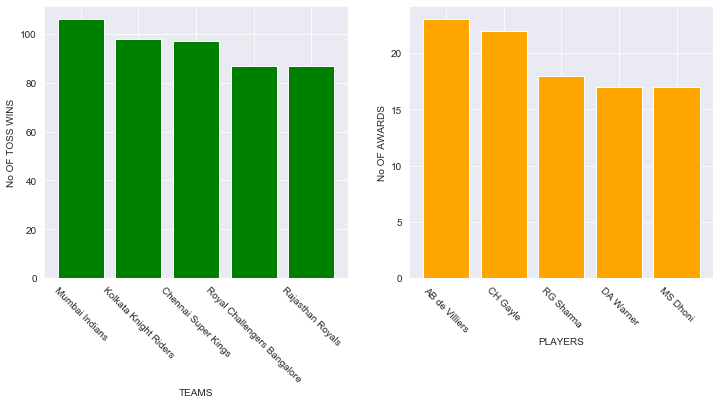

In [45]:
#lets look at the top 5 toss winners and man of the match
plt.figure(figsize=(12,5))
data1=final_df.toss_winner.value_counts().head()
plt.subplot(1,2,1);
plt.bar(data1.keys(),data1,color='g');
plt.xticks(rotation=-45);
plt.xlabel('TEAMS');
plt.ylabel('No OF TOSS WINS');

data2=final_df.player_of_match.value_counts().head()
plt.subplot(1,2,2);
plt.bar(data2.keys(),data2,color='orange');
plt.xticks(rotation=-45);
plt.xlabel('PLAYERS');
plt.ylabel('No OF AWARDS');

We can see that there is no drastic changes in the top5 of both the graphs

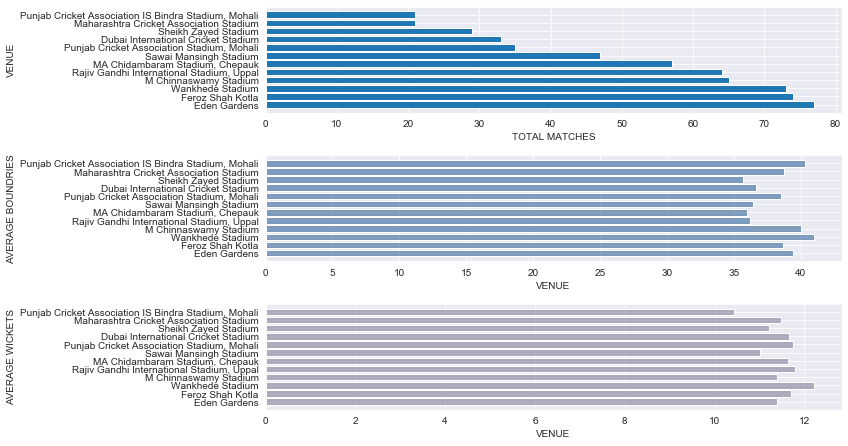

In [46]:
#lets see stadium wise data(only for stadiums which has hosted more than 20 matches).
plt.figure(figsize=(10,7))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

plt.subplot2grid((3,2),(0,0),colspan=2)
plt.barh(stadium_stats.venue,stadium_stats.total_matches);
plt.ylabel('VENUE');
plt.xlabel('TOTAL MATCHES');

plt.subplot2grid((3,2),(1,0),colspan=2)
plt.barh(stadium_stats.venue,stadium_stats.boundries_per_match,color=(0.2, 0.4, 0.6, 0.6));
plt.xlabel('VENUE');
plt.ylabel('AVERAGE BOUNDRIES');

plt.subplot2grid((3,2),(2,0),colspan=2)
plt.barh(stadium_stats.venue,stadium_stats.wickets_per_match,color=(0.5, 0.5, 0.6, 0.6));
plt.xlabel('VENUE');
plt.ylabel('AVERAGE WICKETS');

We can see that of the stadiums hosted most matches Wankhede has most boundries and wickets per match, while PCA Mohali has a big difference between boundries and wickets per match so it can be said that it is a high scoring ground.

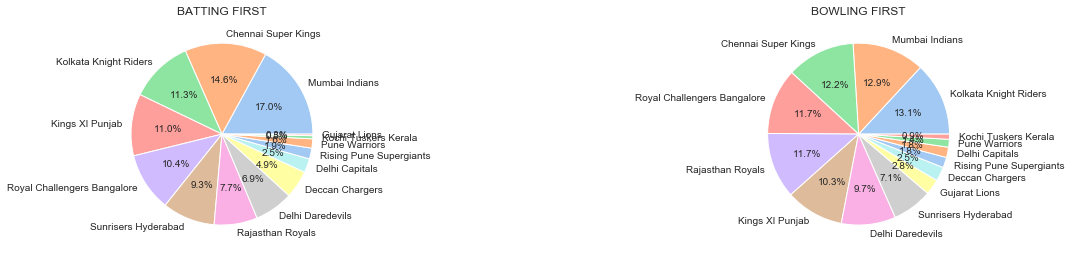

In [47]:
#Now lets see which team has highest win% while batting and bowling first.
batting_first=final_df[final_df.result=='runs']
bowling_first=final_df[final_df.result=='wickets']

plt.figure(figsize=(15,15))
colors = sns.color_palette('pastel')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)


plt.subplot2grid((1,3),(0,0))
plt.pie(batting_first.winner.value_counts(), labels=batting_first.winner.value_counts().keys(), colors=colors, autopct='%0.1f%%');
plt.title('BATTING FIRST');

plt.subplot2grid((1,3),(0,2))
plt.pie(bowling_first.winner.value_counts(), labels=bowling_first.winner.value_counts().keys(), colors=colors, autopct='%0.1f%%');
plt.title('BOWLING FIRST');


We can notice that whether it is batting or bowling first MI is better than others.

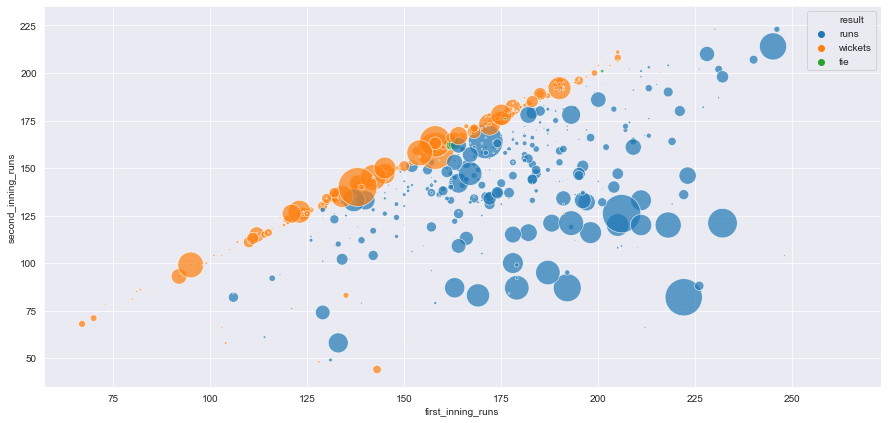

In [48]:
#Lets see a comparison of victory margin while chasing and defending.
plt.figure(figsize=(15,7))
area= np.pi * (0.15*(final_df.result_margin))**2
sns.scatterplot(data=final_df, x='first_inning_runs', y="second_inning_runs",hue='result', s=area, alpha=0.7, cmap='Spectral')
plt.show()

As seen in the plot the orange circle is the win margin by wickets and as there are only few bigger circles that means that most of the wins have been by a lesser wicket margin. Also the blue circles means that a match is won by team batting first so majority of the matches have gone to the wire but few high scoring matches have been one sided. Some matches are represented by green dots which were tied.

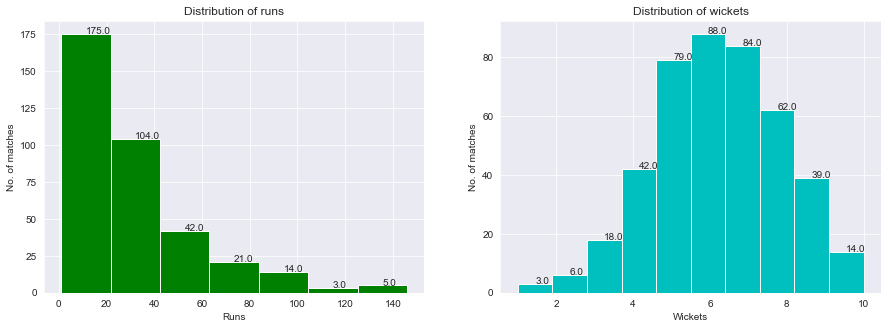

In [49]:
#Now lets see the margin of all matches by team batting first.
plt.figure(figsize=(15,5))

plt.subplot2grid((1,2),(0,0))
plt.xlabel('Runs')
plt.ylabel('No. of matches')
plt.title('Distribution of runs')
_,_,patches1 = plt.hist(batting_first['result_margin'], bins=7, color='g')
for pp in patches1:
   x = (pp._x0 + pp._x1)/2
   y = pp._y1 + 0.05
   plt.text(x, y, pp._y1)

plt.subplot2grid((1,2),(0,1))
plt.xlabel('Wickets')
plt.ylabel('No. of matches')
plt.title('Distribution of wickets')
_,_,patches2 = plt.hist(bowling_first['result_margin'], color='c')
for pp in patches2:
   x = (pp._x0 + pp._x1)/2
   y = pp._y1 + 0.05
   plt.text(x, y, pp._y1)

plt.show()

We can see that Half the no of matches batting first has been won under 20runs and only 8 matches have been won by more than 100 runs. While chasing team have won majority of matches losing around 2 to 5 wickets and only 9 matches have been won when the team lost more than 7 wickets.

In [50]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "khush3nandecha/zerotopandas-course-project-ipl" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/khush3nandecha/zerotopandas-course-project-ipl


'https://jovian.ai/khush3nandecha/zerotopandas-course-project-ipl'

## Asking and Answering Questions
Lets answer some questions based on the data we have analyzed.

### Q1] Which player has won most matches for his team?

In [58]:
most_pom = final_df.player_of_match.value_counts().head()
most_pom

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
Name: player_of_match, dtype: int64

We can see the top 5 players with most player of the match award. Now lets see it in the graph also.

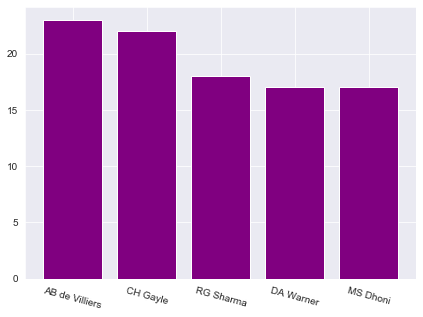

In [65]:
plt.figure(figsize=(7,5))
plt.bar(most_pom.index, most_pom, color='purple')
plt.xticks(rotation=-15)
plt.show()

### Q2] Does toss matters to win a match?

Lets calculate the percentage of matches wom by team which also won the toss.

In [67]:
(final_df.toss_winner==final_df.winner).sum() / (final_df.shape[0]) *100

51.225490196078425

As calculated the percentage of matches won by team winning the toss is just around **51%** so we can say that toss **does not affect the result** of the match. 

### Q3] Which stadium is best for batting and which is best for bowling and which is best for a competitive game?
To see see the stats lets plot the graph for all the stadiums which has hosted more than 20 matches.

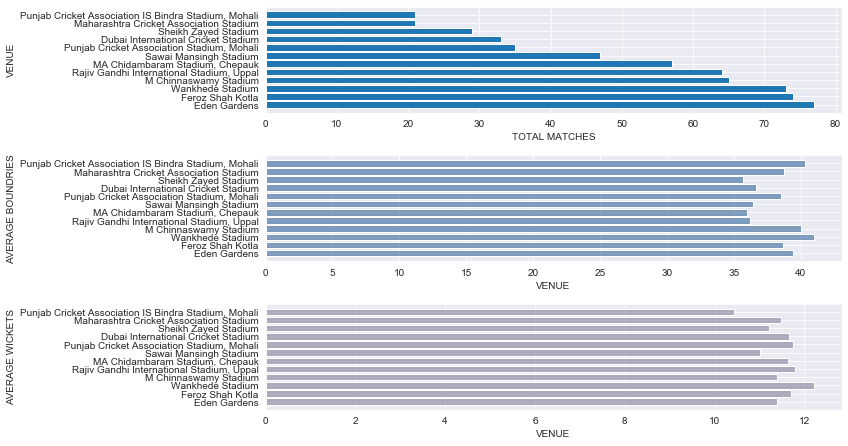

In [68]:
plt.figure(figsize=(10,7))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

plt.subplot2grid((3,2),(0,0),colspan=2)
plt.barh(stadium_stats.venue,stadium_stats.total_matches);
plt.ylabel('VENUE');
plt.xlabel('TOTAL MATCHES');

plt.subplot2grid((3,2),(1,0),colspan=2)
plt.barh(stadium_stats.venue,stadium_stats.boundries_per_match,color=(0.2, 0.4, 0.6, 0.6));
plt.xlabel('VENUE');
plt.ylabel('AVERAGE BOUNDRIES');

plt.subplot2grid((3,2),(2,0),colspan=2)
plt.barh(stadium_stats.venue,stadium_stats.wickets_per_match,color=(0.5, 0.5, 0.6, 0.6));
plt.xlabel('VENUE');
plt.ylabel('AVERAGE WICKETS');

**Punjab Cricket Association Stadium, Mohali** has best conditions for batting as the wickets per match is lowest and boundries per match is highest.<br>
**Rajiv Gandhi International Stadium, Uppal** and **MA Chidambaram Stadium, Chepauk** are best for bowling as the boundries are tough to score here and average wicket per match is also high.<br>
**Wankhede Stadium, Mumbai** is best for a competitive game as boundries per match and wickets per match, both are higher than any other stadium and they both are same so both bowlers and batsman enjoy playing here.

### Q4] Which team is least affected by the result of the toss?
lets plot two pie chart, one for batting first and second for bowling first.

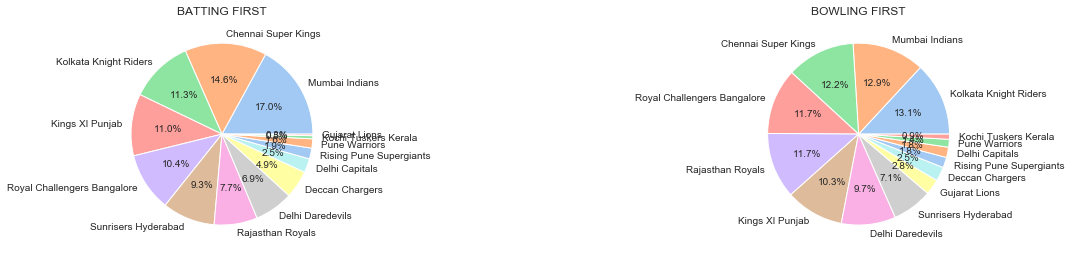

In [69]:
plt.figure(figsize=(15,15))
colors = sns.color_palette('pastel')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)


plt.subplot2grid((1,3),(0,0))
plt.pie(batting_first.winner.value_counts(), labels=batting_first.winner.value_counts().keys(), colors=colors, autopct='%0.1f%%');
plt.title('BATTING FIRST');

plt.subplot2grid((1,3),(0,2))
plt.pie(bowling_first.winner.value_counts(), labels=bowling_first.winner.value_counts().keys(), colors=colors, autopct='%0.1f%%');
plt.title('BOWLING FIRST');

**Mumbai Indians** is least affected by the result of the toss as they have higest percentage of wins while batting first and just behind KKR by 0.2% , so it can be said that they are compartively better in both the departments.

### Q5] Which team is most successful in the IPL?
 lets make a dataframe with win percentage of each team and total matches won by each team.

In [89]:
total_matches_won = final_df.winner.value_counts()
team_stats = pd.merge(percentage_win,total_matches_won, left_index=True, right_index=True)
team_stats.rename(columns={'winner':'total_matches_won'},inplace=True)
team_stats

,win_percentage,total_matches_won
Mumbai Indians,59.1,120
Chennai Super Kings,59.6,106
Kolkata Knight Riders,51.6,99
Royal Challengers Bangalore,46.7,91
Kings XI Punjab,46.3,88
Rajasthan Royals,50.3,81
Delhi Daredevils,41.6,67
Sunrisers Hyderabad,53.2,66
Deccan Chargers,38.7,29
Delhi Capitals,57.6,19


Going by the **win percentage CSK** is the most successful with a win% of **59.6** which is followed closely by **MI** with win% of **59.1**.<br>
But if we go by **most wins** then **MI** is the most successful francise with total no of wins = **120, 14** more than the second successful.

In [52]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "khush3nandecha/zerotopandas-course-project-ipl" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/khush3nandecha/zerotopandas-course-project-ipl


'https://jovian.ai/khush3nandecha/zerotopandas-course-project-ipl'

## Inferences and Conclusion


- Based on the analysis we can say that toss does not affect he result for any team, its how the team plays the crucial situation wins you the matches.<br>
- Also going by the numbers MI and CSK are the two most successful francise in the league.<br>
- It was also seen that some stadiums were from different countries which brings us to the a point that not every season is conducted in India although its Indian Premeire League.

## References 

Check out the following resources to learn more about the dataset and tools used in this notebook:

- Geeksforgeeks: https://www.geeksforgeeks.org/
- Kaggle : https://www.kaggle.com/datasets
- Pandas user guide: https://pandas.pydata.org/docs/user_guide
- Seaborn user guide & tutorial: https://seaborn.pydata.org
- Matplotlib user guide: https://matplotlib.org/3.3.1/users
- Jupyter Notebook user guide : https://jupyter-notebook.readthedocs.io/en/stable/

In [92]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "khush3nandecha/zerotopandas-course-project-ipl" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/khush3nandecha/zerotopandas-course-project-ipl


'https://jovian.ai/khush3nandecha/zerotopandas-course-project-ipl'